# Bienvenido a tu primer competencia de ciencia de datos!!!

En este notebook desarrollaremos el problema del Titanic. Este dataset es el más popular entre todos los que quieren iniciar en este mundo de la Ciencia de Datos. Buscamos predecir si un pasajero, con ciertas caractéristicas, sobrevivió o no a esta tragedia ocurrida en el siglo 20.


![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

En este caso, tenemos dos tablas de datos: train y summit (test.csv). Ahora, esta data ha sido sacada de una **competencia de Kaggle** Por eso, la data que nombraremos como **summit contendrá la base para poder aplicar nuestro modelo ya completado**. El mismo Kaggle se encargará de saber si es un buen modelo o no. Posteriormente, esta tabla nombrada **train nos servirá tanto para entrenar como para testear nuestrso modelos**.
El link de la competencia es: https://www.kaggle.com/c/titanic

In [7]:
"CELDA N°42"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random #Una librería para manejar números aleatorios
import missingno as ms #Librería muy útil para ver los valores nulos

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

In [8]:
"CELDA N043"
train = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/train_preproc_titanic.csv')
summit = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/summit_preproc_titanic.csv')

##**Partición de la data para entrenamiento**

In [9]:
"CELDA N°44"
#Tendremos que crear nuestras variables predictoras X y nuestra variable objetivo Y
X = train.drop('Sobrevivio',axis=1)
y = train['Sobrevivio']

In [10]:
"CELDA N°45"
#Dividimos cada variable para el entrenamiento del modelo importando la lilbrería train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.15,random_state=1) #Separa el 15% de la data para generar las predicciones

In [11]:
"CELDA N°46"
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (757, 7) y para el y_train (757,)
Para el X_test: (134, 7) y para el y_test (134,)


##**Modelo de Regresión Logística**

In [12]:
"CELDA N°47"
#Entrenamos los datos importando la librería LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1) #creamos la variable logreg para el modelo de regresión logística
logreg.fit(X_train, y_train) #entrenamos el modelo de regresión logística usando los datos de X_train, y_train




logreg_pred = logreg.predict(X_test) #generamos las predicciones con X_test usando el modelo de regresión logística
logreg_pred #mostramos las predicciones generadas 0 cuando no sobrevive 1 cuando sí sobrevive

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

###*Score de la regresión logística*

In [13]:
"CELDA N°48"
#Calculamos el score de accuracy comparando las predicciones generadas versus y_test importando la librería accuracy_score
from sklearn.metrics import accuracy_score
print('El accuracy para mi primero modelo es :{0:.8f}'.format(accuracy_score(y_test,logreg_pred))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi primero modelo es :0.80597015


###*Coeficientes de la regresión logística*

In [14]:
"CELDA N°49"
#Mostramos los coeficientes de la ecuación obtenida con la regresión logísticas
coeficientes = pd.DataFrame({'variables':X_train.columns.values, 'betas': np.round(logreg.coef_[0],4) })
coeficientes

,variables,betas
0,Pclass,-0.9037
1,Genero,0.7561
2,Edad,-0.7345
3,Tarifa,0.1102
4,P_embarque,0.0930
5,Miembros_de_fam,-0.3521
6,Viaja_solo,-0.7824


In [15]:
"CELDA N°50"
#Calculamos la probabilidades de obtener 1 (sí sobrevivió) con el método predict_proba
proba_pred_test = logreg.predict_proba(X_test)[:,1]
proba_pred_test

array([0.91729564, 0.08136309, 0.82118345, 0.72672992, 0.52482667,
       0.0826539 , 0.19232699, 0.94525274, 0.50460252, 0.8027339 ,
       0.08242648, 0.64878952, 0.34971917, 0.18026305, 0.72616848,
       0.35364663, 0.1343863 , 0.12153028, 0.0818032 , 0.63221405,
       0.08202955, 0.14262996, 0.93165645, 0.18318907, 0.43221445,
       0.08231814, 0.88020459, 0.8184411 , 0.18143172, 0.91935382,
       0.64952848, 0.35250892, 0.32647374, 0.73977099, 0.11411516,
       0.09878873, 0.35226765, 0.08292933, 0.50455385, 0.08271092,
       0.6486182 , 0.66629049, 0.92326366, 0.35068598, 0.57222651,
       0.08185386, 0.07136162, 0.18001865, 0.39785405, 0.18255087,
       0.21118137, 0.82074147, 0.18221456, 0.18031792, 0.08221043,
       0.74005545, 0.18109702, 0.34811681, 0.02301163, 0.64983199,
       0.10792254, 0.09763139, 0.25429892, 0.35073088, 0.45771161,
       0.70607247, 0.10516566, 0.09765791, 0.38939711, 0.19157263,
       0.0887176 , 0.13416234, 0.39515416, 0.0828742 , 0.81672

###*Optimización del punto de corte*

In [16]:
"CELDA N°51"
#Creamos una función para variar el punto de corte -por defecto 0.5- comparando con las probabilidades obtenidas y calculamos el score en cada iteración
lista_de_accuracy=[]
for punto_de_corte in range(0,100):
    pred_0_1 = [1 if x >= punto_de_corte/100 else 0 for x in proba_pred_test]
    lista_de_accuracy.append(accuracy_score(y_test, pred_0_1))

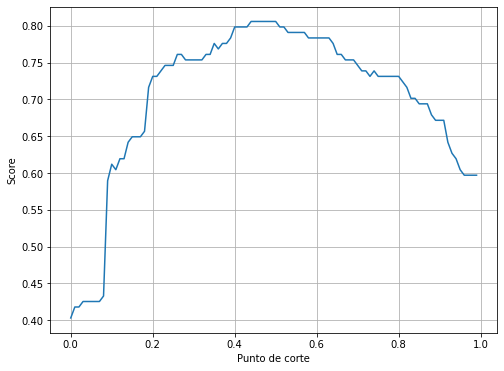

In [17]:
"CELDA N°52"
#Dibujamos los puntos de corte con sus respectivos score
xs = [x/100 for x in range(0,100)]
ys = lista_de_accuracy

plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Punto de corte')
plt.ylabel('Score')
plt.plot(xs, ys)

###*Actualización de la regresión logística*

In [18]:
"CELDA N°53"
#Obtenemos neuvas predicciones (0,1) a partir del nuevo punto de corte óptimo a partir de la gráfica obtenida
predicciones_nuevo_pc = [1 if prob>=0.25 else 0 for prob in proba_pred_test]
np.array([predicciones_nuevo_pc])

array([[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1]])

In [19]:
"CELDA N°54"
#Mostramos un nuevo score comparando y_test con las nuevas predicciones a partir del nuevo punto de corte
print('El accuracy para mi primer modelo con nuevo punto de corte es :{0:.8f}'.format(accuracy_score(y_test,predicciones_nuevo_pc)))

El accuracy para mi primer modelo con nuevo punto de corte es :0.74626866


##**Modelo de Árbol de Clasificación**

In [20]:
"CELDA N°55"
#Entrenamos los datos importando la librería DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=1) #creamos la variable tree_clf para el modelo de árbol de clasificación
tree_clf.fit(X_train,y_train) #entrenamos el modelo de árbol de clasificación usando los datos de X_train, y_train
tree_y_pred = tree_clf.predict(X_test)#generamos las predicciones con X_test usando el modelo de árbol de clasificación
tree_y_pred #mostramos las predicciones generadas 0 cuando no sobrevive 1 cuando sí sobrevive

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

###*Score del árbol de clasificación*

In [21]:
"CELDA N°56"
#Calculamos el score de accuracy comparando las predicciones generadas versus y_test importando la librería accuracy_score
print('El accuracy para mi segundo modelo es :{0:.8f}'.format(accuracy_score(y_test,tree_y_pred))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi segundo modelo es :0.77611940


###*Optimización del nivel de profundidad*

In [22]:
"CELDA N°57"
#Variamos la profundidad de las ramas del árbol de clasificación obtenemos el valor óptimo
for i in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    y_pred = tree_clf.predict(X_test)
    print("Mi árbol da un accuracy de:", accuracy_score(y_test,y_pred), "cuando su max_depth es: ", i)

Mi árbol da un accuracy de: 0.746268656716418 cuando su max_depth es:  1
Mi árbol da un accuracy de: 0.753731343283582 cuando su max_depth es:  2
Mi árbol da un accuracy de: 0.7985074626865671 cuando su max_depth es:  3
Mi árbol da un accuracy de: 0.7985074626865671 cuando su max_depth es:  4
Mi árbol da un accuracy de: 0.7686567164179104 cuando su max_depth es:  5
Mi árbol da un accuracy de: 0.7835820895522388 cuando su max_depth es:  6
Mi árbol da un accuracy de: 0.7985074626865671 cuando su max_depth es:  7
Mi árbol da un accuracy de: 0.753731343283582 cuando su max_depth es:  8
Mi árbol da un accuracy de: 0.7835820895522388 cuando su max_depth es:  9


###*Actualización del árbol de clasificación*

In [23]:
"CELDA N°58"
#Obtenemos las nuevas predicciones para el árbol de clasificación con max_depth óptimo
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf_2=tree_clf.fit(X_train,y_train)
predicciones_nuevo_md = tree_clf_2.predict(X_test)

###*Matriz de confusión del árbol de clasificación*

[]

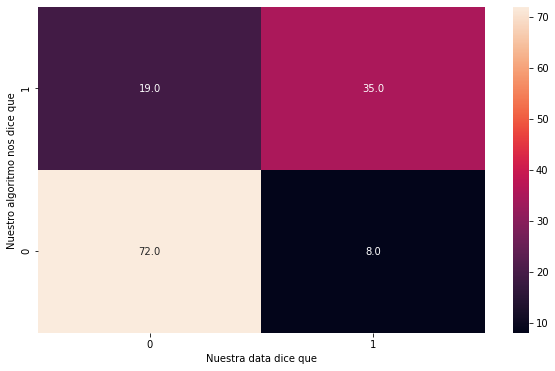

In [24]:
"CELDA N°59"
#Graficamos una matriz de confusión comparando y_test con las nuevas predicciones importando confusion_matrix
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test,predicciones_nuevo_md)

plt.figure(figsize=(10,6))
ax=sns.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data dice que')
plt.ylabel('Nuestro algoritmo nos dice que')
plt.plot()

##**Modelo de Random Forest**

In [25]:
"CELDA N°60"
#Entrenamos los datos importando la librería RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 200, n_jobs = -1,max_depth=3,random_state=1) #creamos la variable tree_clf para el modelo de random forest
rnd_clf.fit(X_train,y_train) #entrenamos el modelo de random forest usando los datos de X_train, y_train
y_pred_rnd = rnd_clf.predict(X_test) #generamos las predicciones con X_test usando el modelo de random forest
y_pred_rnd #mostramos las predicciones generadas 0 cuando no sobrevive 1 cuando sí sobrevive

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0])

###*Score del random forest*

In [26]:
"CELDA N°61"
#Calculamos el score de accuracy comparando las predicciones generadas versus y_test importando la librería accuracy_score
print('El accuracy para mi tercer modelo es :{0:.8f}'.format(accuracy_score(y_test,y_pred_rnd))) #usando la expresión regex .8f para mostrar 8 decimales

El accuracy para mi tercer modelo es :0.77611940


###*Importancia de variables*

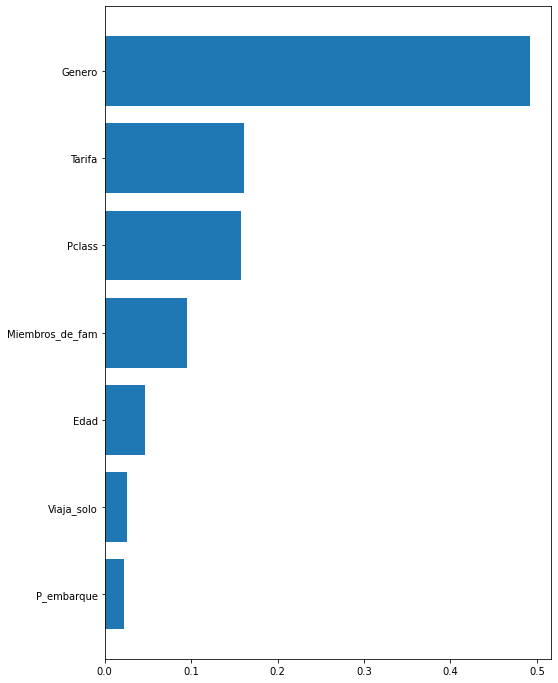

In [27]:
"CELDA N°62"
#Graficamos la importancia de cada variable con gráfica de barras usando el método feature_importances_
pesos = rnd_clf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(pesos)
plt.barh(range(len(indices)), pesos[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.show()

###*Actualización del random forest*

In [28]:
"CELDA N°63"
#Entrenamos nuevamente eliminando las variables menos importantes, actualizamos el modelo de random forest y obtenemos nuevas predicciones
X_train_2 = X_train.drop(['Viaja_solo','P_embarque'],axis=1)
rnd_clf_2=rnd_clf.fit(X_train_2,y_train)
predicciones_rnd_clf_2=rnd_clf_2.predict(X_test.drop(['Viaja_solo','P_embarque'],axis=1))
predicciones_rnd_clf_2

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0])

In [29]:
"CELDA N°64"
#Mostramos un nuevo score comparando y_test con las nuevas predicciones a partir del random forest actualizado
print('El accuracy para mi tercer modelo sin dos variables es :{0:.8f}'.format(accuracy_score(y_test,predicciones_rnd_clf_2)))

El accuracy para mi tercer modelo sin dos variables es :0.79104478


###*Matriz de confusión del random forest*

[]

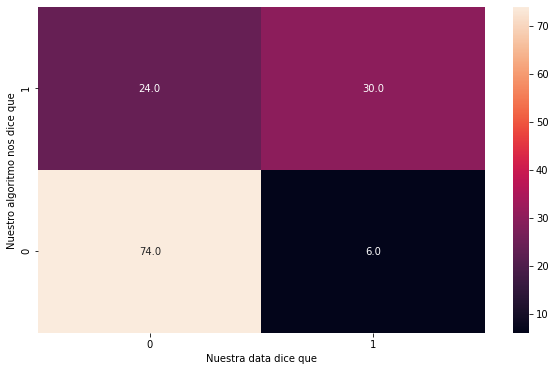

In [30]:
"CELDA N°65"
#Graficamos una matriz de confusión comparando y_test con las nuevas predicciones importando confusion_matrix
matriz_confusion = confusion_matrix(y_test,y_pred_rnd)

plt.figure(figsize=(10,6))
ax=sns.heatmap(matriz_confusion, annot = True, annot_kws={"size": 10}, fmt=".1f")
ax.set_ylim((0,2))
plt.xlabel('Nuestra data dice que')
plt.ylabel('Nuestro algoritmo nos dice que')
plt.plot()

##**Curva ROC para todos los modelos**

In [31]:
"CELDA N°66"
#Importamos las librerías necesarias para dibujar las curvas ROC de todos los modelos actualizados
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

clasificadores = [logreg, tree_clf_2, rnd_clf_2] #creamos la variable clasificadores para guardar los modelos actualizados

###*Tabla de parametros para cada modelo*

In [32]:
"CELDA N°67"
#Creamos una función para obtener los parámetros de la curva ROC para cada uno de los modelos actualizados
tabla_resultados = pd.DataFrame(columns=['clasificadores', 'fpr','tpr','auc'])
for cls in clasificadores:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    tabla_resultados = tabla_resultados.append({'clasificadores':None,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)

In [33]:
"CELDA N°68"
#Mostramos la tabla_resultados declarando como índices el nombre de cada uno de los modelos
tabla_resultados['clasificadores'] = ['regresion_logistica','arbol_clasificacion','random_forest']
tabla_resultados.set_index('clasificadores', inplace=True)
tabla_resultados

,fpr,tpr,auc
clasificadores,,,
regresion_logistica,"[0.0, 0.0, 0.0, 0.0125, 0.0125, 0.025, 0.025, ...","[0.0, 0.018518518518518517, 0.3333333333333333...",0.826620
arbol_clasificacion,"[0.0, 0.0, 0.0, 0.0125, 0.1, 0.3, 0.6875, 0.77...","[0.0, 0.018518518518518517, 0.2222222222222222...",0.842477
random_forest,"[0.0, 0.0, 0.0, 0.0125, 0.0125, 0.05, 0.05, 0....","[0.0, 0.018518518518518517, 0.3148148148148148...",0.838426


###*Gráfica de la curva ROC para cada modelo*

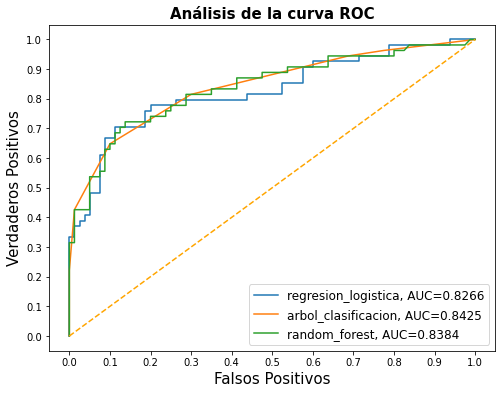

In [34]:
"CELDA N°69"
#Dibujamos la curva ROC con los parámetros obtenidos para cada uno de los modelos actualizados
fig = plt.figure(figsize=(8,6))

for i in tabla_resultados.index:
    plt.plot(tabla_resultados.loc[i]['fpr'], 
             tabla_resultados.loc[i]['tpr'], 
             label="{}, AUC={:.4f}".format(i, tabla_resultados.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Falsos Positivos", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Verdaderos Positivos", fontsize=15)

plt.title('Análisis de la curva ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

##**BONUS: Summit de las predicciones para la competencia Kaggle**

In [35]:
"CELDA N°70"
#Comprobar que el número de columnas (variables predictoras) de summit y X_test coincidan para utilizar el modelo sin errores
summit.shape, X_test.shape

((418, 7), (134, 7))

In [36]:
"CELDA N°71"
#Aplicar el modelo sobre summit y mostrar la supervivencia resultante (0=No sobrevivió, 1=Sí sobrevivió)
summit_rnd_clf_2=rnd_clf_2.predict(summit)
summit_rnd_clf_2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
"CELDA N°72"
#Extraer los Id de los pasajeros del archivo summit original
submission = pd.read_csv('https://raw.githubusercontent.com/HackSpacePeru/Datasets_intro_Data_Science/master/Titanic/gender_submission.csv')
summit_id=submission['PassengerId']

In [38]:
"CELDA N°73"
#Comprobar que el tamaño de las predicciones y summmit_id coincidan para unir ambos dataset sin errores
summit_rnd_clf_2.shape, summit_id.shape

((418,), (418,))

In [39]:
"CELDA N°74"
#Crear un diccionario para guardar ambos dataset y crear un nuevo dataframe llamado respuestas para unir ambos dataset
summit_dict = {'PassengerId':summit_id,'Survived':summit_rnd_clf_2}
respuestas = pd.DataFrame(summit_dict)
respuestas.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [40]:
"CELDA N°75"
#Generar un archivo csv con tu nombre -no olvidar la extensión csv
respuestas.to_csv('tu_nombre.csv',index=False)